# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data = project_data.sample(n=10000)

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
86551      114684  p049177  679f50f18ce50aabcc602d17f7627206           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
86551           HI 2016-04-27 02:18:58             Grades 3-5   

      project_subject_categories  project_subject_subcategories  \
473             Applied Learning              Early Development   
86551             Math & Science  Applied Sciences, Mathematics   

                                project_title  \
473    Flexible Seating for Flexible Learning   
86551         Dash and Dot Robotic Duo Needed   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
86551  Do you remember the first time you saw Star Wa...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
86551  I am a teacher/librarian at an elementary scho...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
86551  My students need a Dash and Dot robot duo to e...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
86551  These robots incorporate the STEM subject area...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
86551  My students need a Dash & Dot Pack and Wonder ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
86551                                            41                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [7]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

#from collections import Counter
#my_counter = Counter()
#for word in project_data['clean_categories'].values:
#    my_counter.update(word.split())
#
#cat_dict = dict(my_counter)
#sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
#my_counter = Counter()
#for word in project_data['clean_subcategories'].values:
#    my_counter.update(word.split())
#    
#sub_cat_dict = dict(my_counter)
#sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
1      114684  p049177  679f50f18ce50aabcc602d17f7627206           Mrs.   

  school_state                Date project_grade_category  \
0           GA 2016-04-27 00:53:00          Grades PreK-2   
1           HI 2016-04-27 02:18:58             Grades 3-5   

                            project_title  \
0  Flexible Seating for Flexible Learning   
1         Dash and Dot Robotic Duo Needed   

                            project_resource_summary  \
0  My students need flexible seating in the class...   
1  My students need a Dash & Dot Pack and Wonder ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             2                    1  481.04   
1                                            41                    1  479.94   

   quantity clean_categories          clean_subcategories  \
0         9  AppliedLearning             EarlyDevelopment   
1         2     Math_Science  AppliedSciences Mathematics   

                                               essay  
0  I recently read an article about giving studen...  
1  Do you remember the first time you saw Star Wa...

In [12]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[200])
print(sent)
print("="*50)

\"Because you believed I was capable of behaving decently, I did.\"-Paulo Coehlo, The Devil and Miss Prym\r\nOur students need to see that we support them in making changes for the better in their lives. This often starts with changing classroom behavior knowing that academic improvements may follow.The majority of our school is low income, urban, and comes from a wide variety of cultural backgrounds. The students are vested in their education, but often lack general supplies needed to succeed. The problems seen in urban areas are prevalent in our students, and have resulted in behavioral deficits in some. Through work done with support staff and teachers, they learn how to handle tough situations in a responsible manner, as well as how to organize their life in order to achieve their goals.Students will use inspirational bracelets as a reminder that there are people in the building that believe in their potential. Many of them complain of headaches, which is largely due to dehydration

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 Because you believed I was capable of behaving decently, I did. -Paulo Coehlo, The Devil and Miss Prym  Our students need to see that we support them in making changes for the better in their lives. This often starts with changing classroom behavior knowing that academic improvements may follow.The majority of our school is low income, urban, and comes from a wide variety of cultural backgrounds. The students are vested in their education, but often lack general supplies needed to succeed. The problems seen in urban areas are prevalent in our students, and have resulted in behavioral deficits in some. Through work done with support staff and teachers, they learn how to handle tough situations in a responsible manner, as well as how to organize their life in order to achieve their goals.Students will use inspirational bracelets as a reminder that there are people in the building that believe in their potential. Many of them complain of headaches, which is largely due to dehydration, so

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 Because you believed I was capable of behaving decently I did Paulo Coehlo The Devil and Miss Prym Our students need to see that we support them in making changes for the better in their lives This often starts with changing classroom behavior knowing that academic improvements may follow The majority of our school is low income urban and comes from a wide variety of cultural backgrounds The students are vested in their education but often lack general supplies needed to succeed The problems seen in urban areas are prevalent in our students and have resulted in behavioral deficits in some Through work done with support staff and teachers they learn how to handle tough situations in a responsible manner as well as how to organize their life in order to achieve their goals Students will use inspirational bracelets as a reminder that there are people in the building that believe in their potential Many of them complain of headaches which is largely due to dehydration so the water bottles

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:20<00:00, 493.31it/s]


In [20]:
# after preprocesing
preprocessed_essays[200]

'believed capable behaving decently paulo coehlo devil miss prym students need see support making changes better lives often starts changing classroom behavior knowing academic improvements may follow majority school low income urban comes wide variety cultural backgrounds students vested education often lack general supplies needed succeed problems seen urban areas prevalent students resulted behavioral deficits work done support staff teachers learn handle tough situations responsible manner well organize life order achieve goals students use inspirational bracelets reminder people building believe potential many complain headaches largely due dehydration water bottles help reduce amount time need leave class go water fountain students anxious stressed use stress balls manipulatives help calm remain focused students suffering array mental disorders use mandala coloring books pencils center donations help classroom school tremendously pbis positive behavior interventions supports prog

In [21]:
project_data['essay'] = preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [22]:
# similarly you can preprocess the titles also

In [23]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 9569.75it/s]


In [24]:
project_data['project_title'] = preprocessed_titles

## 1.5 Preparing data for models

In [25]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [26]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
1      114684  p049177  679f50f18ce50aabcc602d17f7627206           Mrs.   

  school_state                Date project_grade_category  \
0           GA 2016-04-27 00:53:00          Grades PreK-2   
1           HI 2016-04-27 02:18:58             Grades 3-5   

                        project_title  \
0  flexible seating flexible learning   
1         dash dot robotic duo needed   

                            project_resource_summary  \
0  My students need flexible seating in the class...   
1  My students need a Dash & Dot Pack and Wonder ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             2                    1  481.04   
1                                            41                    1  479.94   

   quantity clean_categories          clean_subcategories  \
0         9  AppliedLearning             EarlyDevelopment   
1         2     Math_Science  AppliedSciences Mathematics   

                                               essay  
0  recently read article giving students choice l...  
1  remember first time saw star wars wall e robot...

In [27]:
X = project_data.drop(['project_is_approved','Unnamed: 0','id','teacher_id','Date','project_resource_summary','quantity'],axis=1)
y = project_data['project_is_approved']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.2, random_state = 42)

In [30]:
print(X_train.shape)
#print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
#print(y_cv.shape)
print(y_test.shape)

(8000, 9)
(2000, 9)
(8000,)
(2000,)


### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [31]:
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())
    
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [32]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot_train = vectorizer.fit_transform(X_train['clean_categories'].values)
#categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig train ",categories_one_hot_train.shape)
#print("Shape of matrix after one hot encodig cv ",categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig test ",categories_one_hot_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig train  (8000, 9)
Shape of matrix after one hot encodig test  (2000, 9)


In [33]:
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [34]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_train = vectorizer.fit_transform(X_train['clean_subcategories'].values)
#sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig train ",sub_categories_one_hot_train.shape)
#print("Shape of matrix after one hot encodig cv",sub_categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig test",sub_categories_one_hot_test.shape)

['Economics', 'FinancialLiteracy', 'CommunityService', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'TeamSports', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'AppliedSciences', 'Health_Wellness', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig train  (8000, 30)
Shape of matrix after one hot encodig test (2000, 30)


In [35]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [36]:
state_count = X_train['school_state'].value_counts()
state_count_dict = dict(state_count)
sorted_state_count_dict = dict(sorted(state_count_dict.items(), key=lambda kv: kv[1]))

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_state_count_dict.keys()), lowercase=False, binary=True)
school_state_one_hot_train = vectorizer.fit_transform(X_train['school_state'].values)
#school_state_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)
school_state_one_hot_test = vectorizer.transform(X_test['school_state'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding train ",school_state_one_hot_train.shape)
#print("Shape of matrix after one hot encoding cv ",school_state_one_hot_cv.shape)
print("Shape of matrix after one hot encoding test ",school_state_one_hot_test.shape)

['VT', 'MT', 'WY', 'ND', 'RI', 'NE', 'SD', 'ME', 'NH', 'DE', 'AK', 'HI', 'WV', 'NM', 'DC', 'KS', 'IA', 'ID', 'AR', 'CO', 'KY', 'MD', 'OR', 'MS', 'MN', 'TN', 'NV', 'WI', 'UT', 'CT', 'VA', 'AL', 'LA', 'NJ', 'OK', 'AZ', 'OH', 'WA', 'MA', 'IN', 'MO', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encoding train  (8000, 51)
Shape of matrix after one hot encoding test  (2000, 51)


In [37]:
teacher_prefix_count = X_train['teacher_prefix'].value_counts()
teacher_prefix_dict = dict(teacher_prefix_count)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
teacher_prefix_one_hot_train = vectorizer.fit_transform(X_train['teacher_prefix'].apply(lambda x: np.str_(x)).values)
#teacher_prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].apply(lambda x: np.str_(x)).values)
teacher_prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].apply(lambda x: np.str_(x)).values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding train",teacher_prefix_one_hot_train.shape)
#print("Shape of matrix after one hot encoding cv",teacher_prefix_one_hot_cv.shape)
print("Shape of matrix after one hot encoding test",teacher_prefix_one_hot_test.shape)

['Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encoding train (8000, 4)
Shape of matrix after one hot encoding test (2000, 4)


In [38]:
project_grade_count = X_train['project_grade_category'].value_counts()
project_grade_dict = dict(project_grade_count)
sorted_project_grade_dict = dict(sorted(project_grade_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_dict.keys()), lowercase=False, binary=True)
project_grade_one_hot_train = vectorizer.fit_transform(X_train['project_grade_category'].values)
#project_grade_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values)
project_grade_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding train ",project_grade_one_hot_train.shape)
#print("Shape of matrix after one hot encoding cv ",project_grade_one_hot_cv.shape)
print("Shape of matrix after one hot encoding test ",project_grade_one_hot_test.shape)

['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2']
Shape of matrix after one hot encoding train  (8000, 4)
Shape of matrix after one hot encoding test  (2000, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [39]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_train = vectorizer.fit_transform(X_train['essay'].values)
#text_tfidf_cv = vectorizer.transform(X_cv['essay'].values)
text_tfidf_test = vectorizer.transform(X_test['essay'].values)
print("Shape of matrix after one hot encoding train",text_tfidf_train.shape)
#print("Shape of matrix after one hot encoding cv",   text_tfidf_cv.shape)
print("Shape of matrix after one hot encoding test", text_tfidf_test.shape)

Shape of matrix after one hot encoding train (8000, 5460)
Shape of matrix after one hot encoding test (2000, 5460)


In [41]:
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf_train= vectorizer.fit_transform(X_train['project_title'].values)
#title_tfidf_cv= vectorizer.transform(X_cv['project_title'].values)
title_tfidf_test= vectorizer.transform(X_test['project_title'].values)
print("Shape of matrix after one hot encoding train ",title_tfidf_train.shape)
#print("Shape of matrix after one hot encoding cv ",   title_tfidf_cv.shape)
print("Shape of matrix after one hot encoding test ", title_tfidf_test.shape)

Shape of matrix after one hot encoding train  (8000, 556)
Shape of matrix after one hot encoding test  (2000, 556)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [42]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [43]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
#price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.fit_transform(X=X_train['price'].values.reshape(-1, 1))
#price_standardized_cv    = price_scalar.transform(X=X_cv['price'].values.reshape(-1, 1))
price_standardized_test  = price_scalar.transform(X=X_test['price'].values.reshape(-1, 1))

In [44]:
print("(",str(len(price_standardized_train)),",",str(len(price_standardized_train[0])),")")
#print("(",str(len(price_standardized_cv)),",",   str(len(price_standardized_cv[0])),")")
print("(",str(len(price_standardized_test)),",", str(len(price_standardized_test[0])),")")

( 8000 , 1 )
( 2000 , 1 )


In [45]:
pre_proj_scalar = StandardScaler()
pre_proj_standardized_train = pre_proj_scalar.fit_transform(X=X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
#pre_proj_standardized_cv    = pre_proj_scalar.transform(X=X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
pre_proj_standardized_test  = pre_proj_scalar.transform(X=X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print("(",str(len(pre_proj_standardized_train)),",",str(len(pre_proj_standardized_train[0])),")")
#print("(",str(len(pre_proj_standardized_cv)),",",   str(len(pre_proj_standardized_cv[0])),")")
print("(",str(len(pre_proj_standardized_test)),",", str(len(pre_proj_standardized_test[0])),")")

( 8000 , 1 )
( 2000 , 1 )


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [46]:
print(categories_one_hot_train.shape)
#print(categories_one_hot_cv.shape)
print(categories_one_hot_test.shape)
print(sub_categories_one_hot_train.shape)
#print(sub_categories_one_hot_cv.shape)
print(sub_categories_one_hot_test.shape)
print(school_state_one_hot_train.shape)
#print(school_state_one_hot_cv.shape)
print(school_state_one_hot_test.shape)
print(teacher_prefix_one_hot_train.shape)
#print(teacher_prefix_one_hot_cv.shape)
print(teacher_prefix_one_hot_test.shape)
print(project_grade_one_hot_train.shape)
#print(project_grade_one_hot_cv.shape)
print(project_grade_one_hot_test.shape)
print(text_tfidf_train.shape)
#print(text_tfidf_cv.shape)
print(text_tfidf_test.shape)
print(title_tfidf_train.shape)
#print(title_tfidf_cv.shape)
print(title_tfidf_test.shape)
print("(",str(len(price_standardized_train)),",",str(len(price_standardized_train[0])),")")
#print("(",str(len(price_standardized_cv)),",",   str(len(price_standardized_cv[0])),")")
print("(",str(len(price_standardized_test)),",", str(len(price_standardized_test[0])),")")
print("(",str(len(pre_proj_standardized_train)),",",str(len(pre_proj_standardized_train[0])),")")
#print("(",str(len(pre_proj_standardized_cv)),",",   str(len(pre_proj_standardized_cv[0])),")")
print("(",str(len(pre_proj_standardized_test)),",", str(len(pre_proj_standardized_test[0])),")")

(8000, 9)
(2000, 9)
(8000, 30)
(2000, 30)
(8000, 51)
(2000, 51)
(8000, 4)
(2000, 4)
(8000, 4)
(2000, 4)
(8000, 5460)
(2000, 5460)
(8000, 556)
(2000, 556)
( 8000 , 1 )
( 2000 , 1 )
( 8000 , 1 )
( 2000 , 1 )


In [47]:
from scipy.sparse import hstack
X_TFIDF_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_one_hot_train, teacher_prefix_one_hot_train, project_grade_one_hot_train,
                     price_standardized_train, pre_proj_standardized_train,text_tfidf_train, title_tfidf_train))
#X_TFIDF_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_one_hot_cv,
#                     price_standardized_cv, pre_proj_standardized_cv,text_tfidf_cv , title_tfidf_cv))
X_TFIDF_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_one_hot_test, teacher_prefix_one_hot_test, project_grade_one_hot_test,
                     price_standardized_test, pre_proj_standardized_test,text_tfidf_test, title_tfidf_test))
print(X_TFIDF_train.shape)
#print(X_TFIDF_cv.shape)
print(X_TFIDF_test.shape)

(8000, 6116)
(2000, 6116)


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features.
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● As this is very computationally expensive, take <b>5k</b> datapoints only to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● Take <b>5k</b> datapoints only.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [48]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [49]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [50]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Dimensionality Reduction on the selected features </h2>

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [51]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [52]:
from sklearn.feature_selection import SelectKBest,f_classif
X_SKB_train = SelectKBest(score_func=f_classif,k=5000).fit_transform(X=X_TFIDF_train,y=y_train)
#X_SKB_cv = SelectKBest(score_func=f_classif,k=5000).fit_transform(X=X_TFIDF_cv,y=y_cv)
X_SKB_test = SelectKBest(score_func=f_classif,k=5000).fit_transform(X=X_TFIDF_test,y=y_test)
print(X_SKB_train.shape)
#print(X_SKB_cv.shape)
print(X_SKB_test.shape)

(8000, 5000)
(2000, 5000)


<h2>2.5 Apply Kmeans</h2>

In [56]:
from sklearn.cluster import KMeans

In [69]:
sum_of_squared_distances = []
for k in tqdm(range(1,15)):
    km = KMeans(n_clusters=k)
    km = km.fit(X_SKB_train)
    sum_of_squared_distances.append(km.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [03:36<00:00, 15.47s/it]


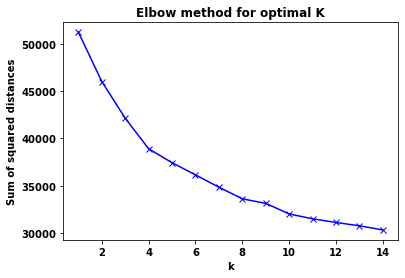

In [70]:
plt.plot(range(1,15),sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [65]:
from wordcloud import WordCloud
def plot_word_cloud(text):
    word_cloud = WordCloud(collocations=False,background_color='white',stopwords=stopwords).generate(text)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

instruct school 100 students free lunch students immigrants children impoverish neighborhoods parents latin americas caribbean students learning speak english struggling reading language arts language barriers children economically challenge neighborhoods families minimum wage workers not afford buy books provide internet access learning reading e books home kids dedicated learners need materials learn made feel care education although not born u however american students need given opportunities american born children receive migrant children needs classes well equipped students needs much requesting however ask much let start saying since non english speakers coming economically challenge families important well equip classroom learning english language reading speaking listening writing mandatory skills must taught esl class therefore headsets requested listening center used center rotation furthermore laptop printer camera use upper level ells students write monthly news letters al

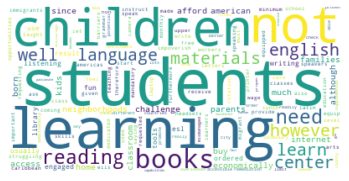

students rural school need desire tools learn grow integral part society class room literature used provide practice imaginary life situations experiences students read discover different worlds cultures think critically problem solve gain knowledge variety topics learn human nature literature provides students lifetime experience without live lifetime get school 50 plus poverty level jr high students leave social economical challenges door enter classroom ready challenge strive learn develop life long learns desire knowledge wisdom allowing enhance lives community providing opportunity 8th grade students read novel time creates community readers thinkers questioners generous donations every 8th grade student novel hand providing opportunity active engagement student make personal connections parts text influence students close reading develop questions author ideas identify themes draw meaning world around based insights gained reading students able refer text support ideas enhance cl

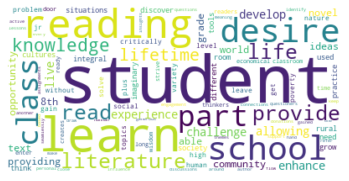

diverse group eager learn fifth grade students new york city students special needs learners one biggest challenges students writing writing important part daily lives however difficult skill learn master resources materials teaching aids help students develop writing skills contributing future success students adults teaching express good writing skills key asset every stage life whether students writing hand computer many assignments exams require students write short answers longer essays way assessing learned students get older expected show sophisticated writing skills complete sophisticated tasks writing addition many colleges universities require students write essays part admissions application able express crucial mental emotional wellness one reasons believe writing important students get creative let frustrations share views learn appreciate differences peers writing walk fifth grade english class likely hear kids asking ever need know truth writing skills play larger part p

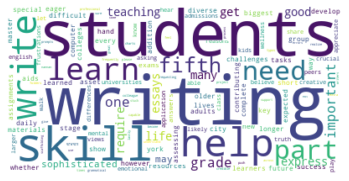

students happy bunch restless five six year olds keeping engaged long day challenging not use kid friendly materials want lure students wanting learn day not feel like work students bright come environment financial limitations kept parents siblings reaching higher school not one places kids challenging better best no matter circumstancesthe printer ink paper asking mostly used print classroom newsletter parent communications well weekly homework even though main office disposes high grade printer many times ink wait days copies made order communicate parents effectively would love option printer classroom would also use printer get various activities children practice writing reading math


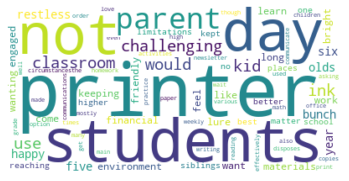

In [66]:
essay_df = pd.DataFrame(columns=['essay'],data=X_test['essay'])
km = KMeans(n_clusters=4)
km = km.fit(X_SKB_test)
essay_df['cluster_tfidf'] = km.labels_
essay_df = essay_df.groupby(['cluster_tfidf'])
for i in range(4):
    review_text = X_test.loc[essay_df.groups[i][0]]['essay']
    print(review_text)
    plot_word_cloud(review_text) 

<h2>2.6 Apply AgglomerativeClustering</h2>

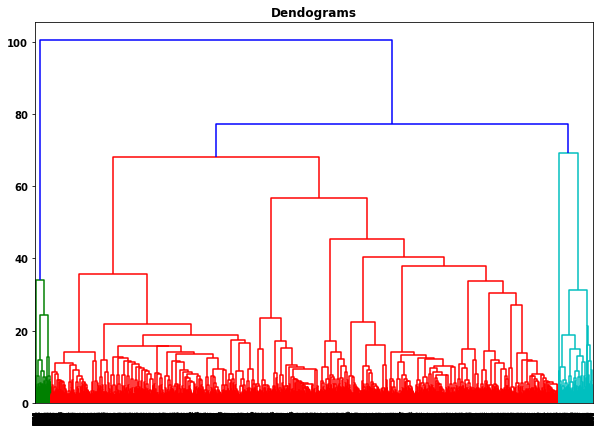

In [69]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(X_SKB_train.toarray(),method='ward'))

students happy bunch restless five six year olds keeping engaged long day challenging not use kid friendly materials want lure students wanting learn day not feel like work students bright come environment financial limitations kept parents siblings reaching higher school not one places kids challenging better best no matter circumstancesthe printer ink paper asking mostly used print classroom newsletter parent communications well weekly homework even though main office disposes high grade printer many times ink wait days copies made order communicate parents effectively would love option printer classroom would also use printer get various activities children practice writing reading math


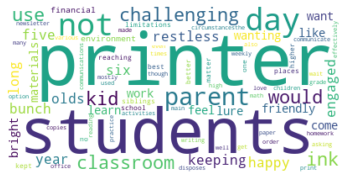

diverse group eager learn fifth grade students new york city students special needs learners one biggest challenges students writing writing important part daily lives however difficult skill learn master resources materials teaching aids help students develop writing skills contributing future success students adults teaching express good writing skills key asset every stage life whether students writing hand computer many assignments exams require students write short answers longer essays way assessing learned students get older expected show sophisticated writing skills complete sophisticated tasks writing addition many colleges universities require students write essays part admissions application able express crucial mental emotional wellness one reasons believe writing important students get creative let frustrations share views learn appreciate differences peers writing walk fifth grade english class likely hear kids asking ever need know truth writing skills play larger part p

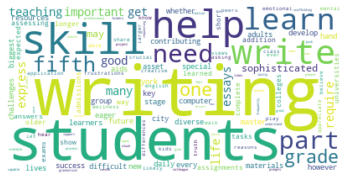

In [71]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(X_SKB_test.toarray())
essay_df = pd.DataFrame(columns=['essay'],data=X_test['essay'])
essay_df['cluster_tfidf'] = cluster.labels_
essay_df = essay_df.groupby(['cluster_tfidf'])
for i in range(2):
    review_text = X_test.loc[essay_df.groups[i][0]]['essay']
    print(review_text)
    plot_word_cloud(review_text)

students rural school need desire tools learn grow integral part society class room literature used provide practice imaginary life situations experiences students read discover different worlds cultures think critically problem solve gain knowledge variety topics learn human nature literature provides students lifetime experience without live lifetime get school 50 plus poverty level jr high students leave social economical challenges door enter classroom ready challenge strive learn develop life long learns desire knowledge wisdom allowing enhance lives community providing opportunity 8th grade students read novel time creates community readers thinkers questioners generous donations every 8th grade student novel hand providing opportunity active engagement student make personal connections parts text influence students close reading develop questions author ideas identify themes draw meaning world around based insights gained reading students able refer text support ideas enhance cl

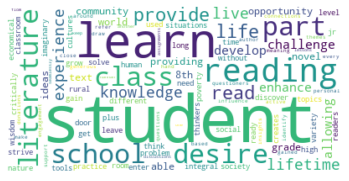

students happy bunch restless five six year olds keeping engaged long day challenging not use kid friendly materials want lure students wanting learn day not feel like work students bright come environment financial limitations kept parents siblings reaching higher school not one places kids challenging better best no matter circumstancesthe printer ink paper asking mostly used print classroom newsletter parent communications well weekly homework even though main office disposes high grade printer many times ink wait days copies made order communicate parents effectively would love option printer classroom would also use printer get various activities children practice writing reading math


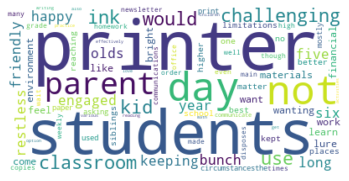

instruct school 100 students free lunch students immigrants children impoverish neighborhoods parents latin americas caribbean students learning speak english struggling reading language arts language barriers children economically challenge neighborhoods families minimum wage workers not afford buy books provide internet access learning reading e books home kids dedicated learners need materials learn made feel care education although not born u however american students need given opportunities american born children receive migrant children needs classes well equipped students needs much requesting however ask much let start saying since non english speakers coming economically challenge families important well equip classroom learning english language reading speaking listening writing mandatory skills must taught esl class therefore headsets requested listening center used center rotation furthermore laptop printer camera use upper level ells students write monthly news letters al

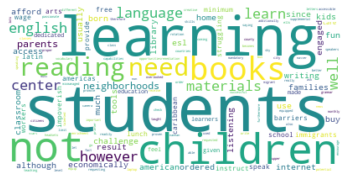

diverse group eager learn fifth grade students new york city students special needs learners one biggest challenges students writing writing important part daily lives however difficult skill learn master resources materials teaching aids help students develop writing skills contributing future success students adults teaching express good writing skills key asset every stage life whether students writing hand computer many assignments exams require students write short answers longer essays way assessing learned students get older expected show sophisticated writing skills complete sophisticated tasks writing addition many colleges universities require students write essays part admissions application able express crucial mental emotional wellness one reasons believe writing important students get creative let frustrations share views learn appreciate differences peers writing walk fifth grade english class likely hear kids asking ever need know truth writing skills play larger part p

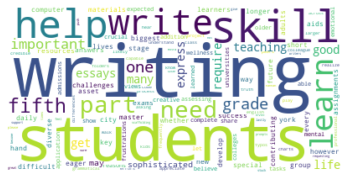

located extremely overcrowded elementary school bronx new york work hard appreciate learning laughter fun play long school day sit seats work often hear explosion laughter coming classroom first grade awesome place child first grade teacher eager excitable group children students need five zenergy ball chairs hope entice students zenergy chairs first colorful cute would make children feel privileged sit chairs opposed feeling different everyone else also chair allows movement no longer child stand make excuse walking across classroom able full concentration added benefit building core strength physical fitness starts tiniest change secretly building backs stomach muscles first grade extremely important grade children child falls behind grade would take least two years catch not want students fall behind zenergy chairs seems like simple fun solution children learn move nannan


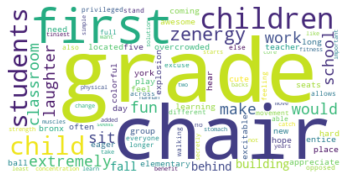

In [72]:
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit(X_SKB_test.toarray())
essay_df = pd.DataFrame(columns=['essay'],data=X_test['essay'])
essay_df['cluster_tfidf'] = cluster.labels_
essay_df = essay_df.groupby(['cluster_tfidf'])
for i in range(5):
    review_text = X_test.loc[essay_df.groups[i][0]]['essay']
    print(review_text)
    plot_word_cloud(review_text)

<h2>2.7 Apply DBSCAN</h2>

In [87]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors((1 * X_SKB_train.shape[1]))
neighbors_fit = neighbors.fit(X=X_SKB_train)
distances,indices = neighbors_fit.kneighbors(X_SKB_train)

In [89]:
distancesDec = sorted(distances[:,(1 * X_SKB_train.shape[1])-1],reverse=True)

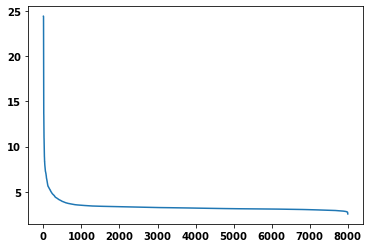

In [92]:
plt.plot(list(range(1,(X_SKB_train.shape[0])+1)),distancesDec)

In [120]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5,min_samples=(1 * X_SKB_train.shape[1]))
cluster = dbscan.fit(X_SKB_train)
print(len(set(cluster.labels_)))

2


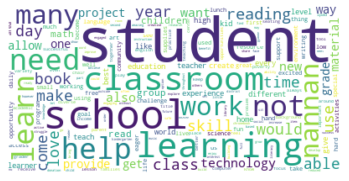

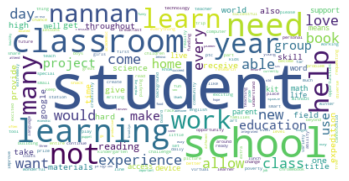

In [121]:
essay_df = pd.DataFrame(columns=['essay'],data=X_train['essay'])
essay_df['cluster_tfidf'] = cluster.labels_
essay_df['essay'] = essay_df.groupby(['cluster_tfidf'])['essay'].transform(lambda x : ' '.join(x))
essay_df = essay_df.drop_duplicates()
for text in essay_df['essay'].values:
    plot_word_cloud(text)